In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns; sns.set_theme(color_codes=True)
%matplotlib inline
import numpy as np

In [5]:
#Import file 
df = pd.read_csv(r"C:\Users\treshanw\OneDrive - Star Garments\Data Science\Group Assingment\Finals\revised_new_wiid.csv")



In [6]:
#Check missing values
df.isna().sum()

id                       0
country                  0
c3                       0
c2                       7
year                     0
gini_reported           12
q1                    1247
q2                    1251
q3                    1251
q4                    1251
q5                    1237
d1                    1398
d2                    1395
d3                    1395
d4                    1395
d5                    1395
d6                    1395
d7                    1395
d8                    1395
d9                    1395
d10                   1394
bottom5               2888
top5                  2841
resource                 0
resource_detailed        0
scale                    0
scale_detailed           0
sharing_unit             0
reference_unit           0
areacovr                 0
areacovr_detailed        0
popcovr                  0
popcovr_detailed         0
region_un                0
region_un_sub            0
region_wb                0
eu                       0
o

In [168]:
#Check columns 
df.columns

Index(['id', 'country', 'c3', 'c2', 'year', 'gini_reported', 'q1', 'q2', 'q3',
       'q4', 'q5', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10',
       'bottom5', 'top5', 'resource', 'resource_detailed', 'scale',
       'scale_detailed', 'sharing_unit', 'reference_unit', 'areacovr',
       'areacovr_detailed', 'popcovr', 'popcovr_detailed', 'region_un',
       'region_un_sub', 'region_wb', 'eu', 'oecd', 'incomegroup', 'mean',
       'median', 'currency', 'reference_period', 'exchangerate', 'mean_usd',
       'median_usd', 'gdp_ppp_pc_usd2011', 'population', 'revision', 'quality',
       'quality_score', 'source', 'source_detailed', 'source_comments',
       'survey', 'source_rank'],
      dtype='object')

In [169]:
#Filter data to refrain from any biased data. For the time series analysis resource and scale will be disregarded as we are considering more countries to represnt in our analysis. 

df = df[(df.areacovr =='All') & (df.popcovr == 'All') & (df.reference_unit == "Person") & (df.sharing_unit=="Household") ]

In [7]:
#Remove any duplicates after filtering 
#Sort values according to quality score and filter 
df=df.sort_values(by = ['country', 'year','quality_score', 'source_rank'], ascending = [True,True,False,True])
df.shape

(4315, 56)

In [8]:
#remove duplicates

df =df.drop_duplicates(subset=['country', 'year'])
df.shape

(2235, 56)

In [9]:
#Number of countries in the dataset

df['country'].nunique()

177

In [10]:
#Since there are missing values get GDP data

gdp = pd.read_csv(r'C:\Users\treshanw\OneDrive - Star Garments\Data Science\Group Assingment\Finals\Melted GDP Data.csv')
gdp1 = gdp[['Country Name','variable','value']]
gdp1 = gdp1.rename(columns = {'Country Name':'country','variable':'year','value':'gdp'})
gdp1

,country,year,gdp
0,Aruba,1960,NaN
1,Afghanistan,1960,537777811.1
2,Angola,1960,NaN
3,Albania,1960,NaN
4,Andorra,1960,NaN
...,...,...,...
16099,Kosovo,2020,NaN
16100,"Yemen, Rep.",2020,NaN
16101,South Africa,2020,NaN
16102,Zambia,2020,NaN


In [12]:
#merge GDP data with the dataset

df_gdp = pd.merge(df,gdp1, on = ['year','country'], how = 'left')

df_gdp['gdp'] = round(df_gdp['gdp']/1000000000, 2)

df_gdp

,id,country,c3,c2,year,gini_reported,q1,q2,q3,q4,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,source_rank,gdp
0,1,Afghanistan,AFG,AF,2008,29.00,9.00,13.00,17.00,22.00,...,27294031,New 2013,High,12,National statistical authority,European Commission and the Government of Afgh...,National Risk and Vulnerability Assessment,NaN,5,10.11
1,2,Albania,ALB,AL,1996,27.01,9.15,13.70,17.73,23.29,...,3092228,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,3.20
2,3,Albania,ALB,AL,2002,31.74,8.35,12.58,16.49,22.21,...,3119029,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,4.35
3,4,Albania,ALB,AL,2005,30.60,8.40,12.90,17.03,22.50,...,3079179,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,8.05
4,5,Albania,ALB,AL,2008,29.98,8.87,13.07,16.83,22.23,...,2991651,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,12.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,11089,Zambia,ZMB,ZM,2010,55.62,3.81,6.76,10.49,17.89,...,13850033,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,20.27
2231,11090,Zambia,ZMB,ZM,2015,57.14,2.89,6.00,10.57,19.28,...,16100587,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,21.24
2232,11095,Zimbabwe,ZWE,ZW,1990,56.80,3.98,6.29,10.01,17.38,...,10183113,NaN,Low,13,World Bank,World Bank 2002,Poverty Monitoring Database,"Income, Consumption and Expenditure Survey",2,8.78
2233,11096,Zimbabwe,ZWE,ZW,1995,74.60,0.69,2.80,6.57,13.91,...,11320346,NaN,Low,13,World Bank,"Deininger and Squire, World Bank 2004",World Bank. Compilation,"Income, Consumption and Expenditure Survey",2,7.11


In [13]:
#CHeck in the dataset for each year how many "country" datapoints are available 

year = df_gdp.groupby('year')["country"].count().to_frame()
year



,country
year,
1951,1
1952,1
1953,2
1954,1
1955,1
...,...
2013,77
2014,75
2015,66


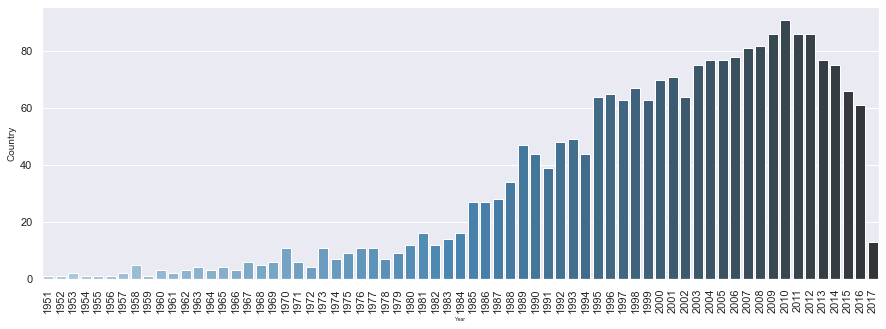

In [14]:
#since there are 177 countries available, we to select years that atleast have 50 countries. 
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
x = year.index
y = year['country']
bar = sns.barplot(x=x, y=y, palette="Blues_d")
plt.xticks(rotation = 90)
bar.set_xlabel("Year",fontsize=10)
bar.set_ylabel("Country",fontsize=10)
bar.xaxis.label.set_size(5)





In [15]:
df_gdp.country.nunique()

177

In [16]:
df_gdp.shape

(2235, 57)

In [18]:
#Flagging years more than 50 countries
year['flag'] = year['country'] >= 50

year[year['flag']== True]





,country,flag
year,,
1995,64,True
1996,65,True
1997,63,True
1998,67,True
1999,63,True
2000,70,True
2001,71,True
2002,64,True
2003,75,True


In [19]:
#Select analysis to start from 1995 and reducing it till 2016. This is to create time bins for the time series analysis

df_gdp_country = df_gdp[(df_gdp['year'] >= 1995)&(df_gdp['year'] < 2017)]

country = df_gdp_country.groupby('year')["country"].count().to_frame()

country

,country
year,
1995,64
1996,65
1997,63
1998,67
1999,63
2000,70
2001,71
2002,64
2003,75


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016')])

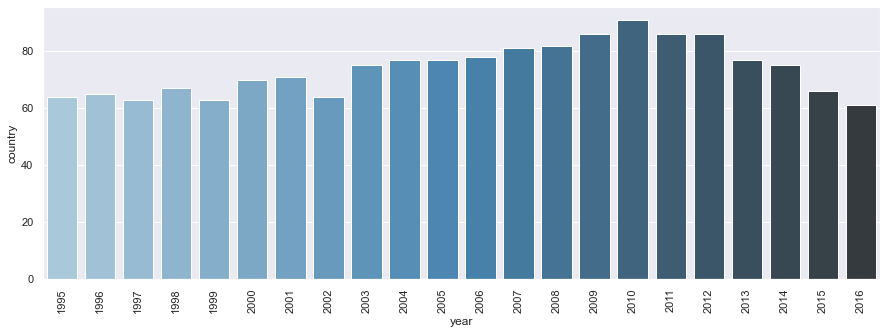

In [21]:
#create bar graph to visulaize how many countries are available per year 
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
x = country.index
y = country['country']
bar = sns.barplot(x=x, y=y, palette="Blues_d")
plt.xticks(rotation=90)



In [47]:
#As a temporal ditribution of countries are not uniform, 
#Create bins for the analysis. Main puporse of bins is to capture atleast one datapoint within the bin for a country. If a bin has multiple rage we will take the median
bins= np.linspace(1995,2016, num = 5, dtype = int)
labels = ['1995-1999','2000-2004','2005-2009','2010-2015']



df_gdp['Yearbin'] = pd.cut(df_gdp['year'], bins=bins,labels = labels, right=False)

df_gdp


,id,country,c3,c2,year,gini_reported,q1,q2,q3,q4,...,revision,quality,quality_score,source,source_detailed,source_comments,survey,source_rank,gdp,Yearbin
0,1,Afghanistan,AFG,AF,2008,29.00,9.00,13.00,17.00,22.00,...,New 2013,High,12,National statistical authority,European Commission and the Government of Afgh...,National Risk and Vulnerability Assessment,NaN,5,10.11,2005-2009
1,2,Albania,ALB,AL,1996,27.01,9.15,13.70,17.73,23.29,...,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,3.20,1995-1999
2,3,Albania,ALB,AL,2002,31.74,8.35,12.58,16.49,22.21,...,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,4.35,2000-2004
3,4,Albania,ALB,AL,2005,30.60,8.40,12.90,17.03,22.50,...,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,8.05,2005-2009
4,5,Albania,ALB,AL,2008,29.98,8.87,13.07,16.83,22.23,...,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,12.88,2005-2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,11089,Zambia,ZMB,ZM,2010,55.62,3.81,6.76,10.49,17.89,...,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,20.27,2010-2015
2231,11090,Zambia,ZMB,ZM,2015,57.14,2.89,6.00,10.57,19.28,...,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,21.24,2010-2015
2232,11095,Zimbabwe,ZWE,ZW,1990,56.80,3.98,6.29,10.01,17.38,...,NaN,Low,13,World Bank,World Bank 2002,Poverty Monitoring Database,"Income, Consumption and Expenditure Survey",2,8.78,NaN
2233,11096,Zimbabwe,ZWE,ZW,1995,74.60,0.69,2.80,6.57,13.91,...,NaN,Low,13,World Bank,"Deininger and Squire, World Bank 2004",World Bank. Compilation,"Income, Consumption and Expenditure Survey",2,7.11,1995-1999


In [48]:
#filter dataset and create new dataset. Drop null values. Analyse how many countries datapoints are available in each bin 
df_2 = df_gdp[(df_gdp['year']>=1995) & (df_gdp['year']<2017) & (df_gdp['gini_reported']>=0)& (df_gdp['gdp']>=0)]

df_2
            
df_2.groupby('Yearbin')['country'].nunique()



Yearbin
1995-1999    101
2000-2004    121
2005-2009    122
2010-2015    130
Name: country, dtype: int64

C:\Users\treshanw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gini_reported'>

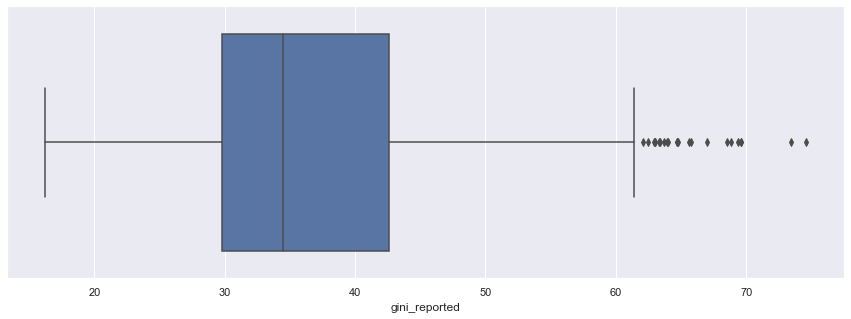

In [29]:
#check for outliers in Gini reported to check whether to use mean or median in groups
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
sns.boxplot(df_2['gini_reported'])

In [50]:
#Calculating median on gini_reported in each bin 

df_mean = df_2.groupby(['Yearbin','country'])['gini_reported'].median().to_frame()

df_mean[df_mean['gini_reported']>=0]

df_mean = df_mean.rename(columns = {'gini_reported':'gini_group_mean'})
df_mean



gini_group_mean
Yearbin   country                            
1995-1999 Afghanistan                     NaN
          Albania                      27.010
          Algeria                      35.330
          Andorra                         NaN
          Angola                          NaN
...                                       ...
2010-2015 Vanuatu                      37.630
          Vietnam                      35.650
          West Bank and Gaza           34.855
          Zambia                       56.380
          Zimbabwe                     43.150

[608 rows x 1 columns]

In [54]:
#Merging mean of each group to the dataset 

df_2_mean = pd.merge(df_2,df_mean, on = ['Yearbin','country'], how = 'left')

df_2.columns


Index(['id', 'country', 'c3', 'c2', 'year', 'gini_reported', 'q1', 'q2', 'q3',
       'q4', 'q5', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10',
       'bottom5', 'top5', 'resource', 'resource_detailed', 'scale',
       'scale_detailed', 'sharing_unit', 'reference_unit', 'areacovr',
       'areacovr_detailed', 'popcovr', 'popcovr_detailed', 'region_un',
       'region_un_sub', 'region_wb', 'eu', 'oecd', 'incomegroup', 'mean',
       'median', 'currency', 'reference_period', 'exchangerate', 'mean_usd',
       'median_usd', 'gdp_ppp_pc_usd2011', 'population', 'revision', 'quality',
       'quality_score', 'source', 'source_detailed', 'source_comments',
       'survey', 'source_rank', 'gdp', 'Yearbin'],
      dtype='object')

In [55]:
df_2.shape

(1425, 58)

In [56]:
#Calculating GDP in each group  

df_gdp = df_2.groupby(['Yearbin','country'])['gdp'].mean().to_frame()

df_gdp[df_gdp['gdp']>=0]

df_gdp = df_gdp.rename(columns = {'gdp':'gdp_group_mean'})

df_gdp = df_gdp[df_gdp['gdp_group_mean']>=0]

df_gdp


gdp_group_mean
Yearbin   country                           
1995-1999 Albania                     3.2000
          Algeria                    41.7600
          Armenia                     1.7800
          Australia                 400.2475
          Austria                   225.3060
...                                      ...
2010-2015 Vanuatu                     0.7000
          Vietnam                   152.6500
          West Bank and Gaza         10.4350
          Zambia                     20.7550
          Zimbabwe                   14.1000

[474 rows x 1 columns]

In [57]:
#merging GDP to the dataset
df_2_mean_gdp = pd.merge(df_2_mean,df_gdp, on = ['Yearbin','country'], how = 'left')

In [59]:
df_2_mean_gdp[(df_2_mean_gdp['country']== 'United States')& (df_2_mean_gdp['Yearbin'] == '2010-2015')]

,id,country,c3,c2,year,gini_reported,q1,q2,q3,q4,...,quality_score,source,source_detailed,source_comments,survey,source_rank,gdp,Yearbin,gini_group_mean,gdp_group_mean
1378,10619,United States,USA,US,2010,40.0,5.33,10.54,15.69,22.88,...,13,Luxembourg Income Study,LIS 2018,NaN,NaN,1,14992.1,2010-2015,47.7,16544.733333
1379,10629,United States,USA,US,2011,47.7,3.20,8.40,14.30,23.00,...,12,National statistical authority,United States Census Bureau,NaN,Current Population Survey,5,15542.6,2010-2015,47.7,16544.733333
1380,10634,United States,USA,US,2012,47.7,3.20,8.30,14.40,23.00,...,12,National statistical authority,United States Census Bureau,NaN,Current Population Survey,5,16197.0,2010-2015,47.7,16544.733333
1381,10639,United States,USA,US,2013,40.7,5.30,10.36,15.45,22.65,...,13,Luxembourg Income Study,LIS 2018,NaN,NaN,1,16784.8,2010-2015,47.7,16544.733333
1382,10650,United States,USA,US,2014,48.0,3.10,8.20,14.30,23.20,...,12,National statistical authority,United States Census Bureau,NaN,Current Population Survey,5,17527.2,2010-2015,47.7,16544.733333
1383,10656,United States,USA,US,2015,47.9,3.10,8.20,14.30,23.20,...,12,National statistical authority,United States Census Bureau,NaN,Current Population Survey,5,18224.7,2010-2015,47.7,16544.733333


In [60]:
#Creating dataframe by region 
df_byregion = df_2_mean_gdp.groupby(['Yearbin','region_un'])['gini_group_mean','gdp_group_mean'].mean().dropna()

df_byregion

<ipython-input-60-f7f79ad5b3e1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_byregion = df_2_mean_gdp.groupby(['Yearbin','region_un'])['gini_group_mean','gdp_group_mean'].mean().dropna()


gini_group_mean  gdp_group_mean
Yearbin   region_un                                 
1995-1999 Africa           50.331053       22.479737
          Americas         51.872462      805.862000
          Asia             40.904054      328.907297
          Europe           30.417557      369.060229
          Oceania          35.178750      224.555000
2000-2004 Africa           44.870769       15.416667
          Americas         51.170462     1005.487692
          Asia             35.899298      288.754912
          Europe           30.612708      363.962222
          Oceania          33.235455      233.488182
2005-2009 Africa           43.605897       35.861282
          Americas         48.938873     1267.035493
          Asia             35.362388      504.669403
          Europe           30.099096      524.457470
          Oceania          38.755556      161.151111
2010-2015 Africa           44.455769       54.139038
          Americas         46.795652     1815.275217
          Asia             36.035176      938.013176
          Europe           29.661618      552.065441
          Oceania          35.382308      389.541538

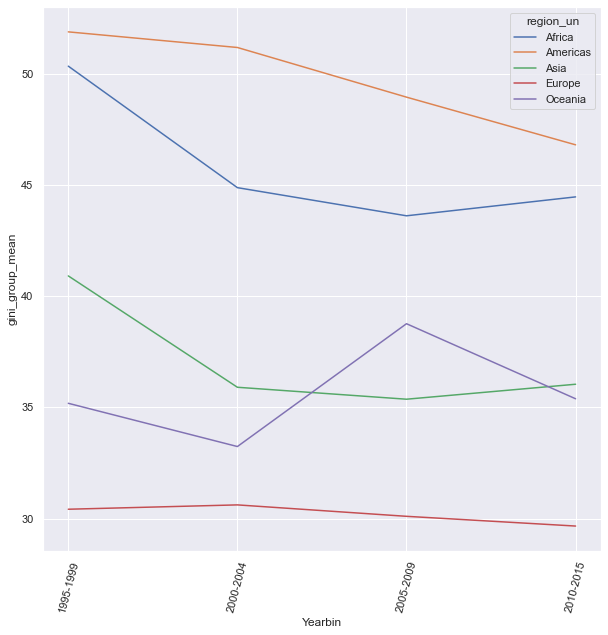

In [61]:
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
sns.lineplot(data = df_byregion, x = 'Yearbin', y = 'gini_group_mean', hue= 'region_un')
plt.xticks(rotation=75)
plt.savefig(r'C:\Users\treshanw\OneDrive - Star Garments\Data Science\Group Assingment\Un-Region gini')


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

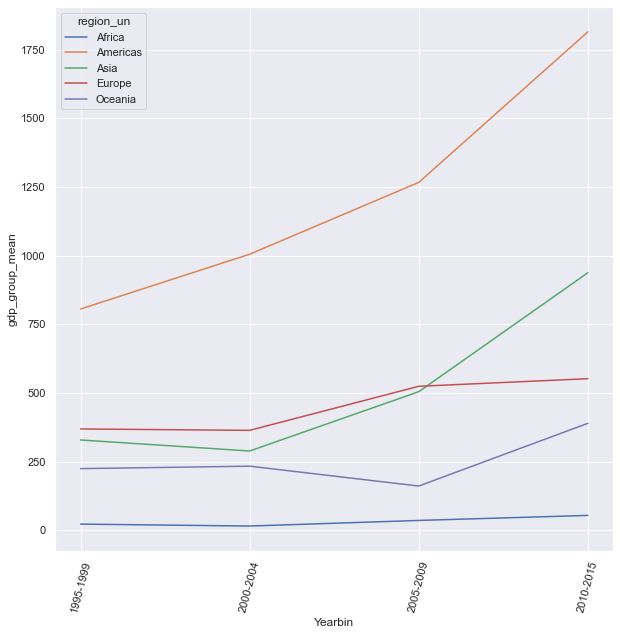

In [63]:
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
sns.lineplot(data = df_byregion, x = 'Yearbin', y = 'gdp_group_mean', hue= 'region_un')
plt.xticks(rotation=75)

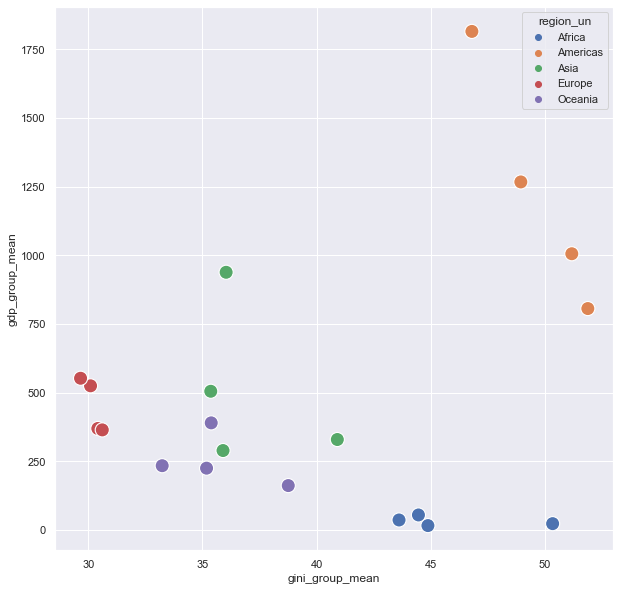

In [64]:
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
x = df_byregion['gini_group_mean']
y = df_byregion['gdp_group_mean']
z = df_byregion.index.get_level_values('region_un')

sns.scatterplot(x=x , y=y, hue = z, s=200)
plt.savefig(r'C:\Users\treshanw\OneDrive - Star Garments\Data Science\Group Assingment\Un-Region Plot')

In [65]:
#Correlation on GDP vs GINI reported 
df_byregion.groupby(['region_un'])['gini_group_mean','gdp_group_mean'].corr().unstack().iloc[:,1].to_frame()

<ipython-input-65-8210a6b15ed4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_byregion.groupby(['region_un'])['gini_group_mean','gdp_group_mean'].corr().unstack().iloc[:,1].to_frame()


,gini_group_mean
,gdp_group_mean
region_un,
Africa,-0.422324
Americas,-0.986412
Asia,-0.376920
Europe,-0.928959
Oceania,-0.391418


In [67]:
#Dataframe for analysis on sub region 
df_bysubregion = df_2_mean_gdp.groupby(['Yearbin','region_wb'])['gini_group_mean','gdp_group_mean'].mean().dropna()

df_bysubregion

<ipython-input-67-8021ecc0391d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bysubregion = df_2_mean_gdp.groupby(['Yearbin','region_wb'])['gini_group_mean','gdp_group_mean'].mean().dropna()


gini_group_mean  gdp_group_mean
Yearbin   region_wb                                                       
1995-1999 East Asia and the Pacific              39.358261      566.257826
          Europe and Central Asia                31.582847      336.233125
          Latin America and the Caribbean        54.349273      112.797091
          Middle East and North Africa           38.146250       45.407500
          North America                          38.250000     4617.719000
          South Asia                             36.348333      108.180000
          Sub-Saharan Africa                     51.991818       21.614848
2000-2004 East Asia and the Pacific              36.789643      616.291429
          Europe and Central Asia                30.974620      313.549766
          Latin America and the Caribbean        53.383273      104.765273
          Middle East and North Africa           37.030000       42.936250
          North America                          39.000000     5959.461000
          South Asia                             39.815000       35.352500
          Sub-Saharan Africa                     45.236389       14.992500
2005-2009 East Asia and the Pacific              38.966207     1004.114828
          Europe and Central Asia                30.529153      480.974127
          Latin America and the Caribbean        50.535410      206.961967
          Middle East and North Africa           33.576667       58.460000
          North America                          39.200000     7733.484000
          South Asia                             36.071250      170.106250
          Sub-Saharan Africa                     43.842703       34.734324
2010-2015 East Asia and the Pacific              37.355870     1593.266304
          Europe and Central Asia                30.268341      521.040917
          Latin America and the Caribbean        48.310526      272.770526
          Middle East and North Africa           34.321818      108.936818
          North America                          39.600000     9142.172500
          South Asia                             36.127000      277.958000
          Sub-Saharan Africa                     45.094894       52.062340

<Figure size 3600x3600 with 0 Axes>

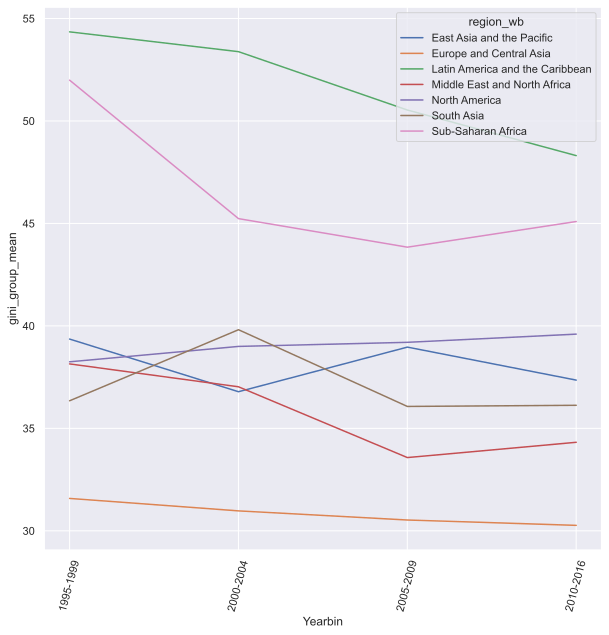

<Figure size 3600x3600 with 0 Axes>

In [202]:
sns.lineplot(data = df_bysubregion, x = 'Yearbin', y = 'gini_group_mean', hue= 'region_wb')
plt.xticks(rotation=75)
plt.figure(figsize=(50,50))


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

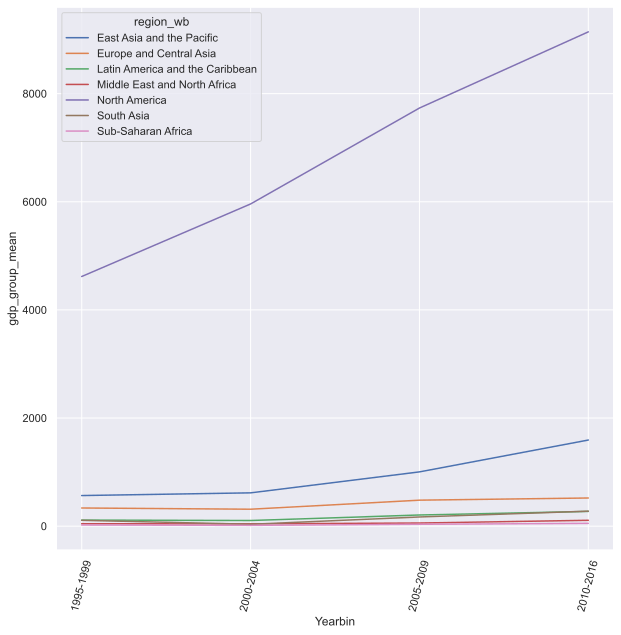

In [203]:
sns.lineplot(data = df_bysubregion, x = 'Yearbin', y = 'gdp_group_mean', hue= 'region_wb')
plt.xticks(rotation=75)

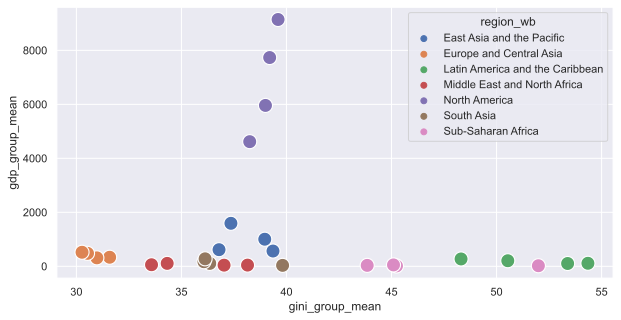

In [240]:
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
x = df_bysubregion['gini_group_mean']
y = df_bysubregion['gdp_group_mean']
z = df_bysubregion.index.get_level_values('region_wb')

sns.scatterplot(x=x , y=y, hue = z, s=200)



plt.savefig(r'C:\Users\treshanw\OneDrive - Star Garments\Data Science\Group Assingment\subregion plot')

In [68]:
#Correalaion gini vs gdp in sub regions 
df_bysubregion.groupby(['region_wb'])['gini_group_mean','gdp_group_mean'].corr().unstack().iloc[:,1].to_frame()



<ipython-input-68-1c0a5749688f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bysubregion.groupby(['region_wb'])['gini_group_mean','gdp_group_mean'].corr().unstack().iloc[:,1].to_frame()


,gini_group_mean
,gdp_group_mean
region_wb,
East Asia and the Pacific,-0.270572
Europe and Central Asia,-0.858839
Latin America and the Caribbean,-0.982988
Middle East and North Africa,-0.617044
North America,0.957015
South Asia,-0.757832
Sub-Saharan Africa,-0.391556


In [69]:
#Analysis on top 10 economies in 2016. Top 10 economies according to world bank has not reported income distribution data in 2016 (India and Japan)
df_top = df_2_mean_gdp[['country','gdp','year']]

df_top = df_2_mean_gdp[df_top['year'] == 2016]

df_top = df_top.sort_values(by = 'gdp', ascending = False).head(10)

top10 = df_top['country'].tolist()

top10

['United States',
 'China',
 'Germany',
 'United Kingdom',
 'France',
 'Italy',
 'Canada',
 'Spain',
 'Mexico',
 'Indonesia']

In [71]:
#Creating data frame
df_2_10 = df_2_mean_gdp[df_2_mean_gdp['country'].isin(top10)]
df_2_10 = df_2_10[df_2_10['year'] != 2017]

df_2_10_count = df_2_10.groupby('year')['country'].count().to_frame()


In [72]:
#Checking count on each year. 
df_2_10_count

,country
year,
1995,8
1996,9
1997,7
1998,8
1999,8
2000,9
2001,7
2002,10
2003,7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016')])

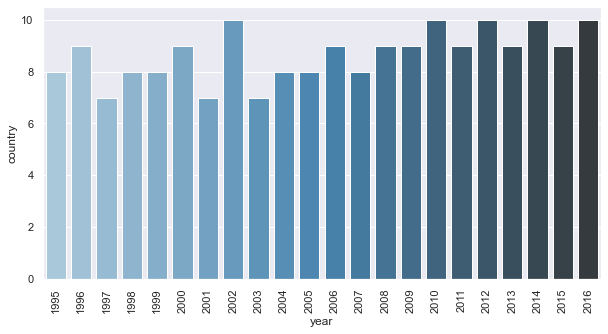

In [73]:
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
x = df_2_10_count.index
y = df_2_10_count['country']
bar = sns.barplot(x=x, y=y, palette="Blues_d" )
plt.xticks(rotation=90)


In [76]:
#Creating dataframe for overall analysis

df_overall_10 = df_2_10.groupby('year')['gini_reported','gdp'].mean().dropna()

df_overall_10


<ipython-input-76-e4206a457a39>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_overall_10 = df_2_10.groupby('year')['gini_reported','gdp'].mean().dropna()


,gini_reported,gdp
year,,
1995,35.750000,2037.007500
1996,35.900000,1868.146667
1997,33.071429,2326.611429
1998,36.612500,2187.833750
1999,33.375000,2212.837500
2000,36.644444,2179.754444
2001,33.128571,2581.901429
2002,36.650000,2145.615000
2003,35.457143,3043.712857


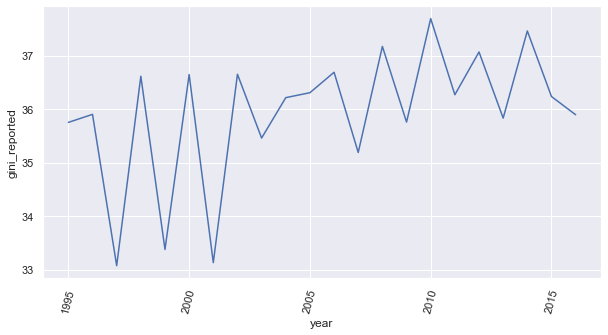

In [77]:
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
x = df_overall_10['gini_reported']
sns.lineplot(data = df_overall_10, x = 'year', y = 'gini_reported')
plt.xticks(rotation=75)


plt.savefig(r'C:\Users\treshanw\OneDrive - Star Garments\Data Science\Group Assingment\top10economies gini')


(array([1990., 1995., 2000., 2005., 2010., 2015., 2020.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

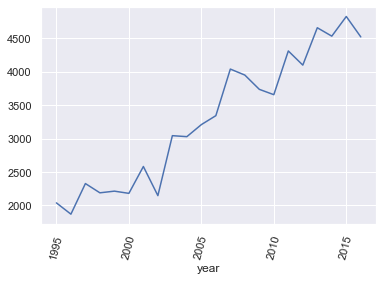

In [78]:
y = df_overall_10['gdp']
y.plot()
plt.xticks(rotation=75)

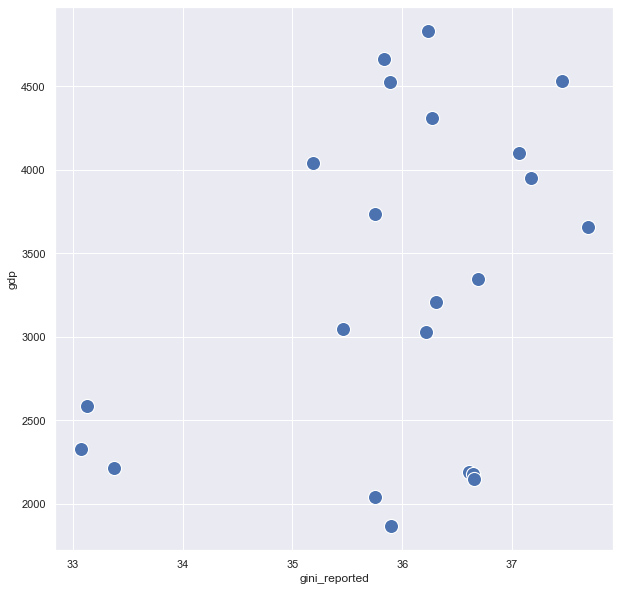

In [79]:
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
x = df_overall_10['gini_reported']
y = df_overall_10['gdp']

sns.scatterplot(x=x , y=y, s= 200)
plt.savefig(r'C:\Users\treshanw\OneDrive - Star Garments\Data Science\Group Assingment\top10economies plot')

In [80]:
#Correlation on gini and gdp in top 10 economies 
df_overall_10['gini_reported'].corr(df_overall_10['gdp'])

0.3681595447802501